**Общая информация**

**Срок сдачи:** 18 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 18 октября, -4 балла после 06:00 25 октября, -6 баллов после 06:00 1 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets, metrics
from sklearn.metrics import pairwise_distances
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KDTree

%load_ext pycodestyle_magic

/home/steady/anaconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [2]:
# с %%pycodestyle какой-то баг. Всегда выдает W391 blank line at end of file, остальное впорядке


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):
    def __init__(self, n_neighbors, algorithm='brute'):
        self._n_neighbors = n_neighbors
        self._algorithm = algorithm

    def fit(self, X, y):
        self._X_train = np.array(X)
        self._y_train = np.array(y, dtype='int')
        self._n_classes = np.unique(y).shape[0]
        self._n_X_train = self._X_train.shape[0]
        if self._algorithm == 'kd_tree':
            self._tree = KDTree(self._X_train)

    def _general_predict(self, res, X, func):
        stat = np.zeros(self._n_classes)

        if self._algorithm == 'brute':
            dists = pairwise_distances(X, self._X_train)
            nearest_partitions = \
                np.argpartition(dists,
                                self._n_neighbors + 1,
                                axis=1)[:, :self._n_neighbors]
        else:
            nearest_partitions = \
                self._tree.query(X, k=self._n_neighbors, return_distance=False)

        for i in range(nearest_partitions.shape[0]):
            for j in range(nearest_partitions.shape[1]):
                stat[self._y_train[nearest_partitions[i, j]]] += 1
            res[i] = func(stat)
            stat *= 0

    def predict(self, X):
        res = np.zeros((X.shape[0]), dtype='int')
        self._general_predict(res, X,
                              lambda x: np.argsort(x)[-1])
        return res

    def predict_proba(self, X):
        res = np.zeros((X.shape[0], self._n_classes))
        self._general_predict(res, X,
                              lambda x: x / self._n_neighbors)
        return res

    def score(self, X, y):
        return np.count_nonzero(self.predict(X) == y) / len(y)

**IRIS**

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
%time clf.fit(X_train, y_train)

CPU times: user 2.26 ms, sys: 137 µs, total: 2.4 ms
Wall time: 1.74 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

CPU times: user 375 µs, sys: 0 ns, total: 375 µs
Wall time: 392 µs


In [8]:
%time clf.predict(X_test)

CPU times: user 7.89 ms, sys: 5.86 ms, total: 13.7 ms
Wall time: 305 ms


array([2, 0, 2, 0, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2, 1])

In [9]:
%time my_clf.predict(X_test)

CPU times: user 1.65 ms, sys: 0 ns, total: 1.65 ms
Wall time: 1.71 ms


array([2, 0, 2, 0, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2, 1])

In [10]:
%time clf.predict_proba(X_test)

CPU times: user 4.84 ms, sys: 166 µs, total: 5 ms
Wall time: 4.06 ms


array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [11]:
%time my_clf.predict_proba(X_test)

CPU times: user 2.51 ms, sys: 871 µs, total: 3.38 ms
Wall time: 2.74 ms


array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [12]:
clf.score(X_test, y_test)

0.9333333333333333

In [13]:
my_clf.score(X_test, y_test)

0.9333333333333333

Задание 3

In [14]:
# %%pycodestyle

res_neighbor_tests = np.zeros(50)
for i_n_neighbor in range(1, 50 + 1):
    num_test = 100
    res_tests = np.zeros(num_test)
    for i_test in range(num_test):
        X_train, X_test, y_train, y_test = \
            train_test_split(iris.data,
                             iris.target,
                             test_size=0.1,
                             stratify=iris.target)
        my_clf = MyKNeighborsClassifier(n_neighbors=i_n_neighbor)
        my_clf.fit(X_train, y_train)
        res_tests[i_test] = my_clf.score(X_test, y_test)
    res_neighbor_tests[i_n_neighbor - 1] = sum(res_tests) / num_test
best_n_neighbor = res_neighbor_tests.argmax() + 1
print(best_n_neighbor)

20


Text(0,0.5,'mean score')

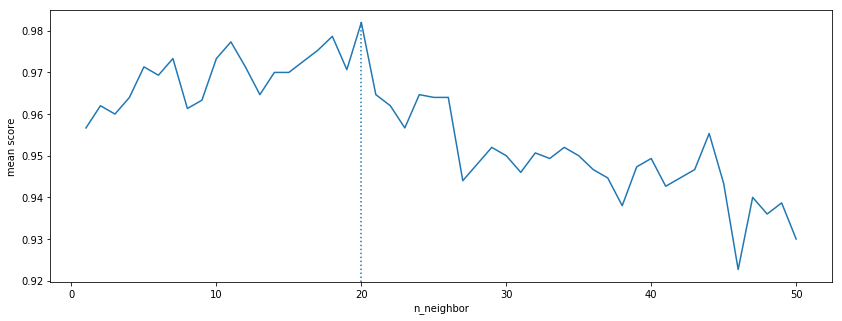

In [15]:
# %%pycodestyle


fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot(111)
ax.plot(range(1, 50 + 1), res_neighbor_tests)
ax.axvline(x=best_n_neighbor,
           ymax=res_neighbor_tests[best_n_neighbor],
           linestyle=':')
ax.set_xlabel('n_neighbor')
ax.set_ylabel('mean score')

**MNIST**

In [16]:
mnist = fetch_mldata('MNIST original')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [18]:
clf = KNeighborsClassifier(n_neighbors=best_n_neighbor, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=best_n_neighbor, algorithm='brute')

In [19]:
%time clf.fit(X_train, y_train)

CPU times: user 20.9 ms, sys: 1.91 ms, total: 22.8 ms
Wall time: 22.7 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [20]:
%time my_clf.fit(X_train, y_train)

CPU times: user 47.4 ms, sys: 78.8 ms, total: 126 ms
Wall time: 34.1 ms


In [21]:
%time clf.predict(X_test)

CPU times: user 40.7 s, sys: 2.07 s, total: 42.7 s
Wall time: 31.4 s


array([7., 1., 6., 4., 5., 7., 4., 9., 3., 4., 2., 5., 6., 3., 7., 3., 9.,
       9., 3., 0., 5., 5., 2., 1., 9., 7., 3., 1., 5., 0., 9., 3., 3., 8.,
       9., 9., 6., 0., 6., 3., 8., 7., 9., 7., 9., 6., 9., 2., 2., 5., 7.,
       8., 9., 1., 7., 6., 8., 0., 1., 5., 6., 2., 0., 0., 0., 2., 7., 1.,
       3., 7., 7., 5., 7., 0., 5., 0., 8., 1., 7., 9., 8., 9., 9., 1., 5.,
       3., 2., 5., 9., 5., 4., 3., 9., 1., 3., 0., 7., 6., 1., 8., 3., 1.,
       1., 8., 0., 2., 3., 7., 1., 0., 1., 6., 1., 6., 2., 4., 3., 3., 5.,
       9., 3., 0., 5., 9., 1., 1., 4., 9., 0., 3., 4., 6., 2., 4., 0., 8.,
       1., 7., 8., 8., 6., 4., 9., 3., 1., 7., 1., 2., 9., 1., 0., 0., 2.,
       9., 2., 0., 2., 6., 2., 8., 0., 5., 0., 3., 0., 1., 3., 4., 1., 7.,
       0., 0., 1., 4., 8., 8., 9., 1., 1., 0., 5., 0., 6., 7., 4., 9., 2.,
       0., 3., 3., 6., 6., 8., 5., 7., 5., 8., 9., 9., 9., 7., 2., 7., 9.,
       7., 2., 0., 4., 7., 6., 6., 4., 8., 3., 6., 5., 4., 3., 0., 2., 9.,
       8., 3., 6., 4., 5.

In [22]:
%time my_clf.predict(X_test)

CPU times: user 40.6 s, sys: 1.37 s, total: 42 s
Wall time: 12.8 s


array([7, 1, 6, 4, 5, 7, 4, 9, 3, 4, 2, 5, 6, 3, 7, 3, 9, 9, 3, 0, 5, 5,
       2, 1, 9, 7, 3, 1, 5, 0, 9, 3, 3, 8, 9, 9, 6, 0, 6, 3, 8, 7, 9, 7,
       9, 6, 9, 2, 2, 5, 7, 8, 9, 1, 7, 6, 8, 0, 1, 5, 6, 2, 0, 0, 0, 2,
       7, 1, 3, 7, 7, 5, 7, 0, 5, 0, 8, 1, 7, 9, 8, 9, 9, 1, 5, 3, 2, 5,
       9, 5, 4, 3, 9, 1, 3, 0, 7, 6, 1, 8, 3, 1, 1, 8, 0, 2, 3, 7, 1, 0,
       1, 6, 1, 6, 2, 4, 3, 3, 5, 9, 3, 0, 5, 9, 1, 1, 4, 9, 0, 3, 4, 6,
       2, 4, 0, 8, 1, 7, 8, 8, 6, 4, 9, 3, 1, 7, 1, 2, 9, 1, 0, 0, 2, 9,
       2, 0, 2, 6, 2, 8, 0, 5, 0, 3, 0, 1, 3, 4, 1, 7, 0, 0, 1, 4, 8, 8,
       9, 1, 1, 0, 5, 0, 6, 7, 4, 9, 2, 0, 3, 3, 6, 6, 8, 5, 7, 5, 8, 9,
       9, 9, 7, 2, 7, 9, 7, 2, 0, 4, 7, 6, 6, 4, 8, 3, 6, 5, 4, 3, 0, 2,
       9, 8, 3, 6, 4, 5, 0, 6, 7, 6, 7, 0, 8, 4, 8, 8, 1, 1, 3, 7, 0, 4,
       9, 2, 2, 1, 7, 4, 5, 8, 6, 7, 8, 8, 8, 4, 4, 5, 4, 1, 4, 0, 9, 8,
       9, 5, 2, 0, 6, 0, 2, 2, 2, 9, 3, 5, 6, 5, 3, 7, 4, 3, 8, 1, 9, 4,
       9, 1, 1, 4, 4, 1, 7, 5, 0, 9, 0, 3, 5, 8, 4,

In [23]:
%time clf.predict_proba(X_test)

CPU times: user 39.6 s, sys: 1.35 s, total: 41 s
Wall time: 12.6 s


array([[0.  , 0.  , 0.  , ..., 1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.95, ..., 0.05, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [24]:
%time my_clf.predict_proba(X_test)

CPU times: user 41.2 s, sys: 1.44 s, total: 42.6 s
Wall time: 13.2 s


array([[0.  , 0.  , 0.  , ..., 1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.95, ..., 0.05, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [25]:
clf.score(X_test, y_test)

0.9614285714285714

In [26]:
my_clf.score(X_test, y_test)

0.9642857142857143

Задание 4

In [27]:
clf = KNeighborsClassifier(n_neighbors=best_n_neighbor, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=best_n_neighbor, algorithm='kd_tree')

In [28]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [29]:
%time clf.fit(X_train, y_train)

CPU times: user 3min 6s, sys: 1.24 s, total: 3min 7s
Wall time: 3min 9s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [30]:
%time my_clf.fit(X_train, y_train)

CPU times: user 3min 7s, sys: 2.42 s, total: 3min 9s
Wall time: 3min 31s


In [31]:
%time clf.predict(X_test)

CPU times: user 3min 57s, sys: 3.36 s, total: 4min
Wall time: 5min 22s


array([3., 4., 6., 9., 1., 7., 3., 6., 2., 6., 2., 9., 2., 2., 7., 1., 3.,
       3., 3., 0., 5., 4., 3., 0., 6., 9., 4., 4., 1., 5., 3., 6., 4., 2.,
       2., 0., 3., 4., 2., 9., 7., 9., 5., 1., 9., 1., 4., 9., 2., 8., 5.,
       5., 2., 0., 7., 3., 4., 9., 7., 4., 8., 8., 0., 5., 0., 6., 6., 8.,
       3., 5., 7., 7., 9., 2., 0., 4., 1., 3., 8., 5., 4., 1., 6., 7., 9.,
       6., 7., 1., 8., 6., 5., 1., 3., 9., 0., 8., 7., 9., 3., 6., 7., 9.,
       1., 1., 4., 5., 9., 1., 1., 1., 8., 6., 7., 9., 4., 3., 3., 2., 9.,
       4., 4., 1., 5., 5., 7., 8., 6., 2., 9., 0., 5., 5., 9., 7., 6., 9.,
       3., 6., 1., 7., 4., 7., 8., 7., 2., 6., 4., 9., 9., 6., 1., 6., 0.,
       1., 2., 7., 3., 1., 4., 6., 0., 7., 0., 3., 2., 1., 9., 0., 5., 1.,
       3., 1., 0., 1., 4., 1., 7., 7., 3., 7., 1., 1., 2., 6., 1., 4., 2.,
       3., 9., 3., 3., 4., 7., 7., 4., 7., 5., 1., 1., 8., 3., 5., 0., 5.,
       2., 5., 8., 2., 4., 0., 8., 5., 7., 1., 7., 2., 2., 9., 8., 5., 2.,
       4., 9., 3., 5., 0.

In [32]:
%time my_clf.predict(X_test)

CPU times: user 3min 17s, sys: 2.74 s, total: 3min 19s
Wall time: 4min 4s


array([3, 4, 6, 9, 1, 7, 3, 6, 2, 6, 2, 9, 2, 2, 7, 1, 3, 3, 3, 0, 5, 4,
       3, 0, 6, 9, 4, 4, 1, 5, 3, 6, 4, 2, 2, 0, 3, 4, 2, 9, 7, 9, 5, 1,
       9, 1, 4, 9, 2, 8, 5, 5, 2, 0, 7, 3, 4, 9, 7, 4, 8, 8, 0, 5, 0, 6,
       6, 8, 3, 5, 7, 7, 9, 2, 0, 4, 1, 3, 8, 5, 4, 1, 6, 7, 9, 6, 7, 1,
       8, 6, 5, 1, 3, 9, 0, 8, 7, 9, 3, 6, 7, 9, 1, 1, 4, 5, 9, 1, 1, 1,
       8, 6, 7, 9, 4, 3, 3, 2, 9, 4, 4, 1, 5, 5, 7, 8, 6, 2, 9, 0, 5, 5,
       9, 7, 6, 9, 3, 6, 1, 7, 4, 7, 8, 7, 2, 6, 4, 9, 9, 6, 1, 6, 0, 1,
       2, 7, 3, 1, 4, 6, 0, 7, 0, 8, 2, 1, 9, 0, 5, 1, 3, 1, 0, 1, 4, 1,
       7, 7, 3, 7, 1, 1, 2, 6, 1, 4, 2, 3, 9, 3, 3, 4, 7, 7, 4, 7, 5, 1,
       1, 8, 3, 5, 0, 5, 2, 5, 8, 2, 4, 0, 8, 5, 7, 1, 7, 2, 2, 9, 8, 5,
       2, 4, 9, 3, 5, 0, 1, 1, 7, 1, 8, 7, 0, 4, 0, 3, 3, 5, 0, 3, 4, 4,
       9, 7, 7, 8, 2, 3, 4, 0, 0, 6, 6, 6, 4, 4, 1, 1, 2, 8, 8, 1, 8, 9,
       7, 2, 1, 2, 2, 3, 3, 8, 6, 3, 9, 2, 1, 0, 4, 3, 1, 3, 2, 6, 6, 5,
       7, 9, 0, 5, 4, 2, 0, 8, 2, 0, 0, 5, 8, 2, 0,

In [33]:
%time clf.predict_proba(X_test)

CPU times: user 3min 57s, sys: 3.11 s, total: 4min 1s
Wall time: 5min 19s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [34]:
%time my_clf.predict_proba(X_test)

CPU times: user 3min 17s, sys: 1.72 s, total: 3min 19s
Wall time: 3min 38s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [35]:
clf.score(X_test, y_test)

0.9571428571428572

In [36]:
my_clf.score(X_test, y_test)

0.9614285714285714

Задание 5

In [37]:
# seaborn
'''Библиотека визуализации с high-level interface основанная на matplotlib.'''
# matplotlib
'''Библиотека для визуализации данных двумерной графикой.'''
# train_test_split
'''Функция библиотеки sklearn, разбивающая массивы или матрицы
на случайную тренировочую выборку и случайную тестирующую'''
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline)
'''Функция позволяющая изменить входные данные и передать на вход следующей'''
# StandardScaler (from sklearn.preprocessing import StandardScaler)
'''Класс позволяющий нормировать фичи обнуляя мат ожидание и приводя дисперсию к единице'''
# ClassifierMixin
'''Класс наследуемый всеми классификаторами в scikit-learn. Содержит метод score'''
# NeighborsBase
'''Наследуемый класс классификаторами на основе kNN.
Инициализирует конструктор классификатора.'''
# KNeighborsMixin
'''Аналогично, но содержит методы поиска соседей, определения до них расстояния.'''
# SupervisedIntegerMixin
'''Добавляет метод обучения для целых целевых меток.'''

'Добавляет метод обучения для целых целевых меток.'